In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sgdata.csv')

In [2]:
import sqlite3

conn = sqlite3.connect(':memory:')

df.to_sql('income',conn , index= False, if_exists='replace')

2000

In [3]:
print(df.head())

          ID  Sex                                     Marital status  Age  \
0  100000001    0                                             single   67   
1  100000002    1  non-single (divorced / separated / married / w...   22   
2  100000003    0                                             single   49   
3  100000004    0                                             single   45   
4  100000005    0                                             single   53   

     Education  Income                   Occupation  Settlement size  
0   university  124670  skilled employee / official                2  
1  high school  150773  skilled employee / official                2  
2  high school   89210       unemployed / unskilled                0  
3  high school  171565  skilled employee / official                1  
4  high school  149031  skilled employee / official                1  


In [4]:
print(df.isnull().sum())

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   int64 
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB
None


In [6]:
print(df.describe())

                 ID          Sex          Age         Income  Settlement size
count  2.000000e+03  2000.000000  2000.000000    2000.000000      2000.000000
mean   1.000010e+08     0.457000    35.909000  120954.419000         0.739000
std    5.774946e+02     0.498272    11.719402   38108.824679         0.812533
min    1.000000e+08     0.000000    18.000000   35832.000000         0.000000
25%    1.000005e+08     0.000000    27.000000   97663.250000         0.000000
50%    1.000010e+08     0.000000    33.000000  115548.500000         1.000000
75%    1.000015e+08     1.000000    42.000000  138072.250000         1.000000
max    1.000020e+08     1.000000    76.000000  309364.000000         2.000000


In [7]:
print(df['Sex'].value_counts())

Sex
0    1086
1     914
Name: count, dtype: int64


In [8]:
print(df['Marital status'].value_counts())

Marital status
single                                                   1007
non-single (divorced / separated / married / widowed)     993
Name: count, dtype: int64


In [9]:
# Average Income by education level

In [11]:
query = '''
SELECT Education, AVG(Income) AS avg_income
FROM income
GROUP BY Education
ORDER BY avg_income DESC;
''' 

edu_level = pd.read_sql(query,conn)
print(edu_level)

         Education     avg_income
0  graduate school  146818.333333
1       university  145405.982818
2      high school  116367.720058
3  other / unknown  115068.212544


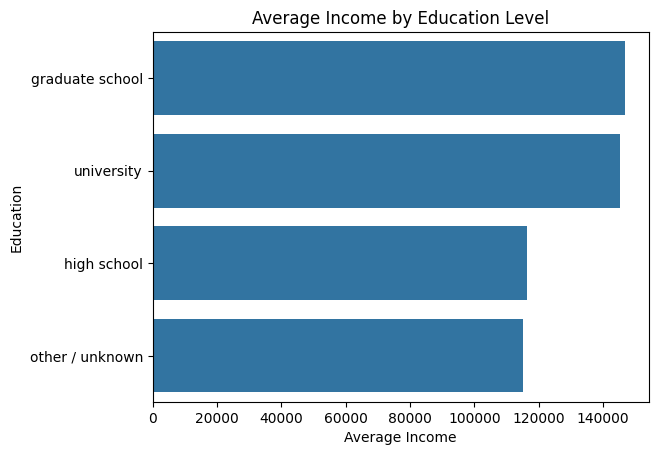

In [12]:
edu_level = df.groupby("Education")['Income'].mean().sort_values(ascending=False)
sns.barplot(x=edu_level.values, y=edu_level.index)
plt.title("Average Income by Education Level")
plt.xlabel("Average Income")
plt.ylabel("Education")
plt.show()

In [13]:
# Income Distribution by Marital Status 

In [22]:
query2 = ''' 
SELECT "Marital Status", AVG(Income) as avg_income
FROM income
GROUP BY "Marital Status"
'''

status = pd.read_sql(query2,conn)
print(status)

                                      Marital status     avg_income
0  non-single (divorced / separated / married / w...  118133.385700
1                                             single  123736.232373


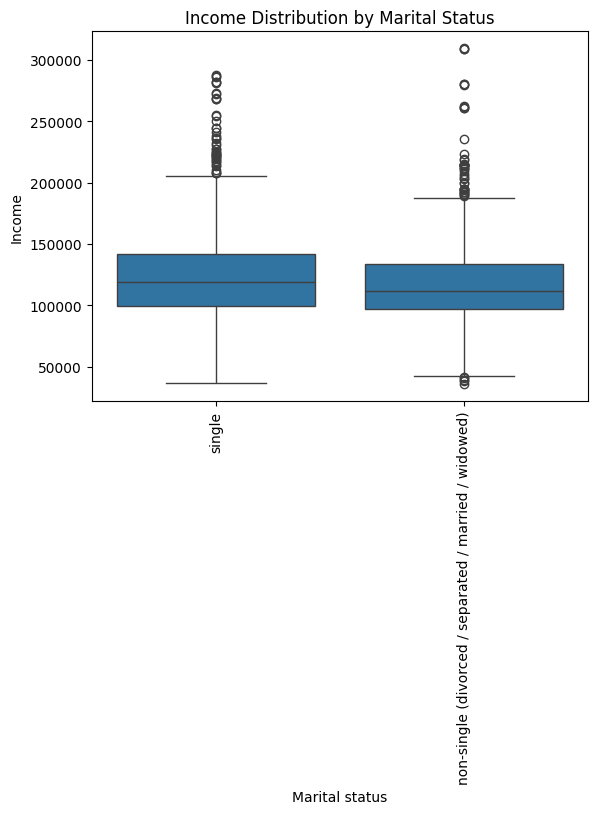

In [26]:
sns.boxplot(x="Marital status", y="Income", data=df)
plt.title("Income Distribution by Marital Status")
plt.xticks(rotation=90)
plt.show()


In [27]:
# Sex Distribution Across Education Levels

In [28]:
query3 = ''' 
SELECT Sex, Education, COUNT(*) AS count
FROM income
GROUP BY Sex, Education
'''

sex_distribution = pd.read_sql(query3 , conn)
print(sex_distribution)

   Sex        Education  count
0    0  graduate school      7
1    0      high school    688
2    0  other / unknown    255
3    0       university    136
4    1  graduate school     29
5    1      high school    698
6    1  other / unknown     32
7    1       university    155


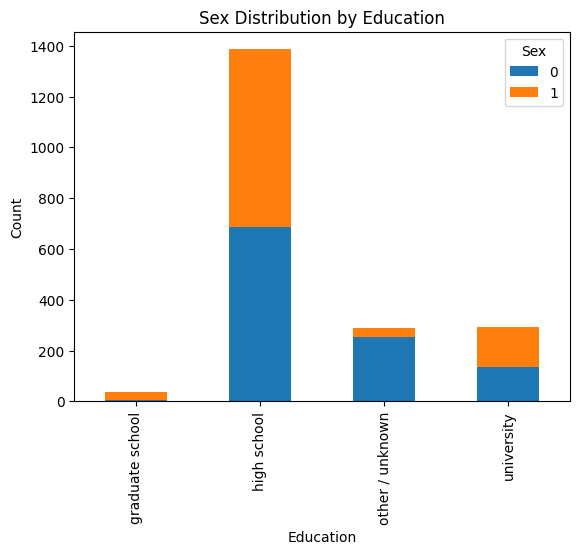

In [29]:
pd.crosstab(df['Education'], df['Sex']).plot(kind="bar", stacked=True)
plt.title("Sex Distribution by Education")
plt.ylabel("Count")
plt.show()


In [30]:
# Income vs Age(Correlation and Trend)

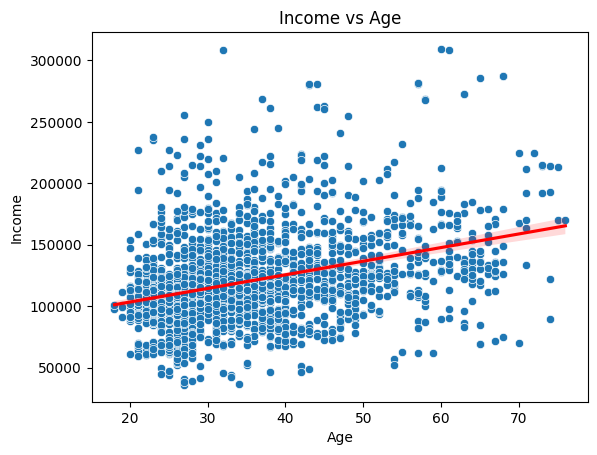

Correlation between Age and Income: 0.3406101637317352


In [31]:
sns.scatterplot(x="Age", y="Income", data=df)
sns.regplot(x="Age", y="Income", data=df, scatter=False, color="red")
plt.title("Income vs Age")
plt.show()

print("Correlation between Age and Income:", df["Age"].corr(df["Income"]))


In [32]:
#Occupation-wise Age and Income Stats

In [34]:
query4 = '''
SELECT Occupation, AVG(Age) as avg_age, AVG(INCOME) as avg_income 
FROM income 
GROUP BY Occupation
''' 

income_stats = pd.read_sql(query4,conn)
print(income_stats)

                                          Occupation    avg_age     avg_income
0  management / self-employed / highly qualified ...  40.940945  176203.862205
1                        skilled employee / official  35.069182  125474.473495
2                             unemployed / unskilled  35.366509   90837.232227


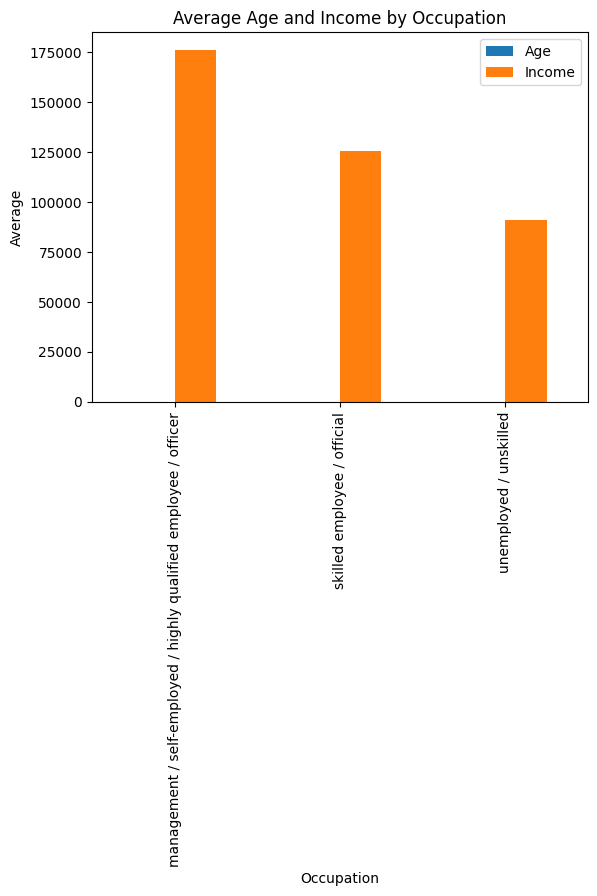

In [36]:
df.groupby("Occupation")[["Age", "Income"]].mean().plot(kind='bar')
plt.title("Average Age and Income by Occupation")
plt.ylabel("Average")
plt.xticks(rotation=90)
plt.show()


In [38]:
#Predictive Modeling: Income Prediction

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Convert categorical variables
df_ml = df.copy()
df_ml = pd.get_dummies(df_ml, columns=['Sex', 'Marital status', 'Education', 'Occupation'], drop_first=True)

X = df_ml.drop(columns=['ID', 'Income'])
y = df_ml['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("R^2 Score:", model.score(X_test, y_test))


R^2 Score: 0.5413446959852173


In [39]:
#Marital Status vs Education vs Income 

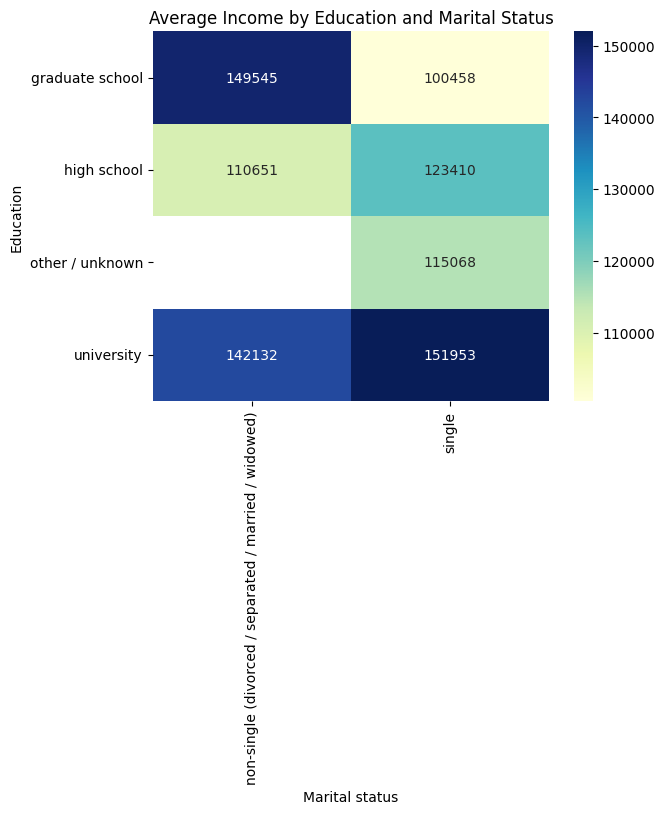

In [52]:
pivot = pd.pivot_table(df, values='Income', index='Education', columns='Marital status', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Income by Education and Marital Status")
plt.xticks(rotation=90)
plt.show()


In [42]:
#Urban vs Rural Behavior (Settlement Size)
#Let’s define:
#0 = Rural
#1 = Semi-Urban
#2 = Urban

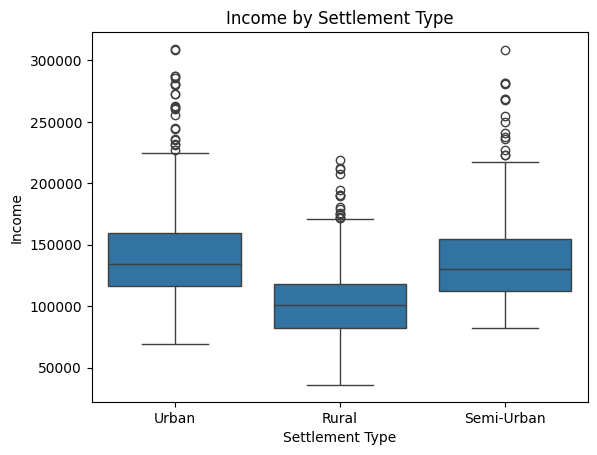

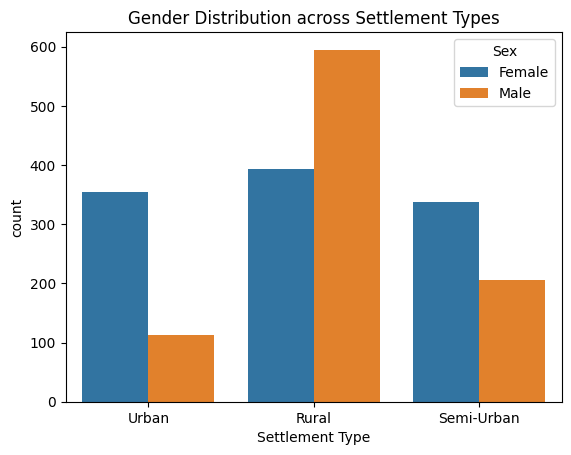

In [43]:
df['Settlement Type'] = df['Settlement size'].map({0: 'Rural', 1: 'Semi-Urban', 2: 'Urban'})

sns.boxplot(x='Settlement Type', y='Income', data=df)
plt.title("Income by Settlement Type")
plt.show()

# Gender vs Settlement
sns.countplot(x='Settlement Type', hue=df['Sex'].map({0: 'Female', 1: 'Male'}), data=df)
plt.title("Gender Distribution across Settlement Types")
plt.show()


In [44]:
#Age Group Segmentation

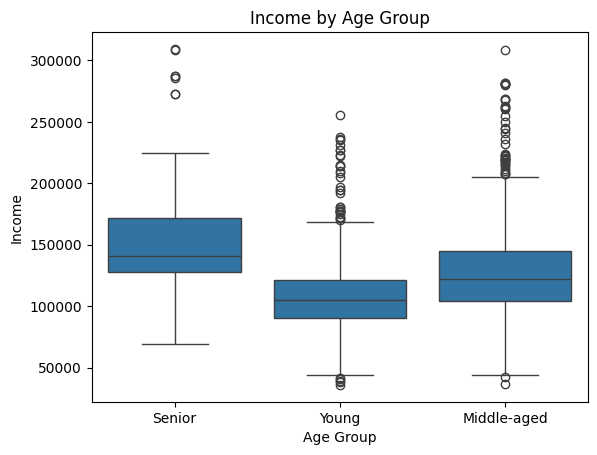

In [45]:
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

df['Age Group'] = df['Age'].apply(age_group)

# Income comparison
sns.boxplot(x='Age Group', y='Income', data=df)
plt.title("Income by Age Group")
plt.show()


In [46]:
query5 = ''' SELECT "Marital status", COUNT(*) FROM income
 GROUP BY "Marital status";
'''

marital = pd.read_sql(query5,conn)
print(marital)

                                      Marital status  COUNT(*)
0  non-single (divorced / separated / married / w...       993
1                                             single      1007


In [48]:
# Marital Status Distribution

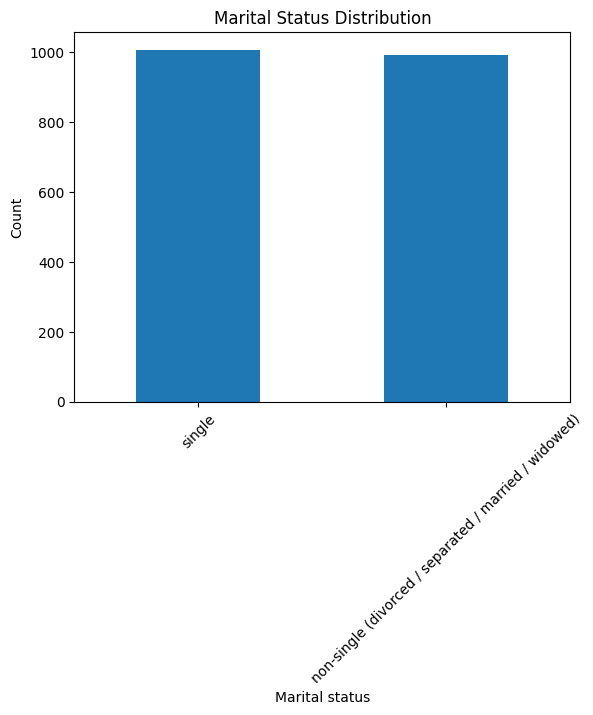

In [47]:
df['Marital status'].value_counts().plot(kind='bar')
plt.title("Marital Status Distribution")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


In [49]:
#Gender Distribution

In [50]:
query6 = ''' 
SELECT Sex, COUNT(*) as count FROM income 
GROUP BY Sex;
'''
gender = pd.read_sql(query6,conn)
print(gender)

   Sex  count
0    0   1086
1    1    914


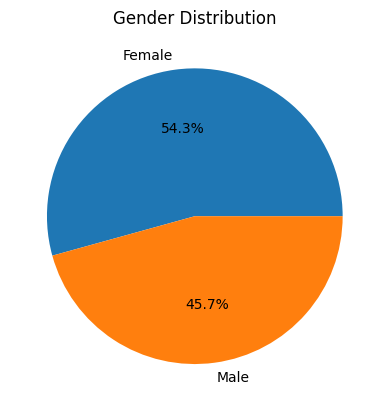

In [51]:
df['Sex'].map({0: 'Female', 1: 'Male'}).value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()
